In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df = pd.read_csv("D:\\Portfolio\\Data Sets\\House Price Kaggel\\train.csv")

In [2]:
pd.options.display.max_columns=90
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Fill Missing Values

In [3]:
total_cell  = np.product(df.shape)
null_cell = df.isnull().sum().sum()
null_percent = (null_cell)/(total_cell)*100
null_percent

5.889565364451209

In [4]:
# Find columns with null values
null_columns = df.columns[df.isna().any()].tolist()
null_columns_count = len(null_columns)
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# fillna
df.LotFrontage = df.LotFrontage.fillna(70)
df.Alley = df.Alley.fillna('No Alley')
df.MasVnrType = df.MasVnrType.fillna('None')
df.MasVnrArea = df.MasVnrArea.fillna(0)
df.BsmtQual = df.BsmtQual.fillna('NB')
df.BsmtCond = df.BsmtCond.fillna('NB')
df.BsmtExposure = df.BsmtExposure.fillna('NB')
df.BsmtFinType1 = df.BsmtFinType1.fillna('NB')
df.BsmtFinType2 = df.BsmtFinType2.fillna('NB')
df.Electrical = df.Electrical.fillna('SBrkr')
df.FireplaceQu = df.FireplaceQu.fillna('NF')
df.GarageType = df.GarageType.fillna('NG')
df.GarageYrBlt = df.GarageYrBlt.fillna(2030)
df.GarageFinish = df.GarageFinish.fillna('NG')
df.GarageQual = df.GarageQual.fillna('NG')
df.GarageCond = df.GarageCond.fillna('NG')
df.PoolQC = df.PoolQC.fillna('NP')
df.Fence = df.Fence.fillna('NFE')
df.MiscFeature = df.MiscFeature.fillna('NM')

Feature Engineering

In [6]:
# check numerical distribution
non_numeric_columns = df.select_dtypes(include=['object'])
numeric_columns = df.select_dtypes(exclude=['object'])
numeric_columns.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1981.363014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,26.735441,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2030.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


c:\Users\Dear User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


{'whiskers': [<matplotlib.lines.Line2D at 0x1a0f4ed7310>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0f4ed7ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0f4e8ca30>],
 'medians': [<matplotlib.lines.Line2D at 0x1a0f4ee7a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0f4ee7fd0>],
 'means': []}

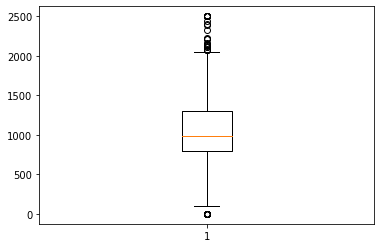

In [7]:
# deal with outlier values
max_threshold = numeric_columns.SalePrice.quantile(0.9)
min_threshold = numeric_columns.SalePrice.quantile(0.1)
numeric_columns.SalePrice = np.where(numeric_columns.SalePrice > max_threshold, max_threshold,numeric_columns.SalePrice)
numeric_columns.YearBuilt = np.where(numeric_columns.YearBuilt < 1924 , 1924,numeric_columns.YearBuilt)
numeric_columns.LotFrontage = np.where(numeric_columns.LotFrontage > 125 , 125,numeric_columns.LotFrontage)
numeric_columns.LotArea = np.where(numeric_columns.LotArea > 17000 , 17000,numeric_columns.LotArea)
numeric_columns.TotalBsmtSF = np.where(numeric_columns.TotalBsmtSF > 2500 , 2500,numeric_columns.TotalBsmtSF)
plt.boxplot(numeric_columns.TotalBsmtSF)


In [8]:
# label encoding
numeric_columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1924,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125.0


In [9]:
# ordinal encoding
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
ordinal_columns_list = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
# ordinal_columns_labeled = non_numeric_columns[ordinal_columns_list].apply(label.fit_transform)


In [10]:
# real ordinal encoding!
import category_encoders as en
dictionary  = [{'col':'ExterQual','mapping':{'Ex':4,'Gd':3,'TA':2,'FA':1,'Po':0}},
                {'col':'ExterCond','mapping':{'Ex':4,'Gd':3,'TA':2,'FA':1,'Po':0}},
                {'col':'BsmtQual','mapping':{'Ex':5,'Gd':4,'TA':3,'FA':2,'Po':1,'NB':0}},
                {'col':'BsmtCond','mapping':{'Ex':5,'Gd':4,'TA':3,'FA':2,'Po':1,'NB':0}},
                {'col':'BsmtExposure','mapping':{'Gd':4,'Av':3,'Mn':2,'No':1,'NB':0}},
                {'col':'HeatingQC','mapping':{'Ex':4,'Gd':3,'TA':2,'FA':1,'Po':0}},
                {'col':'KitchenQual','mapping':{'Ex':4,'Gd':3,'TA':2,'FA':1,'Po':0}},
                {'col':'FireplaceQu','mapping':{'Ex':5,'Gd':4,'TA':3,'FA':2,'Po':1,'NF':0}},
                {'col':'GarageQual','mapping':{'Ex':5,'Gd':4,'TA':3,'FA':2,'Po':1,'NG':0}},
                {'col':'GarageCond','mapping':{'Ex':5,'Gd':4,'TA':3,'FA':2,'Po':1,'NG':0}},
                {'col':'PoolQC','mapping':{'Ex':4,'Gd':3,'TA':2,'FA':1,'NP':0}}]
encoder = en.OrdinalEncoder(cols=ordinal_columns_list,mapping=dictionary)
ordinal_columns_labeled = encoder.fit_transform(non_numeric_columns[ordinal_columns_list])

In [11]:
# categorical encoding
non_numeric_columns_list =  non_numeric_columns.columns.to_list()
categorical_columns_list = [col for col in non_numeric_columns_list if col not in ordinal_columns_list]
categorical_columns_labeled = pd.get_dummies(non_numeric_columns[categorical_columns_list])


In [12]:
# concat data frame
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
# new_numeric_col_1 = stand.fit_transform(new_numeric_col)
# new_numeric_col_2 = pd.DataFrame(new_numeric_col_1,columns=stand.get_feature_names_out())
new_df = pd.concat([ordinal_columns_labeled,categorical_columns_labeled,numeric_columns],axis=1)
new_df = new_df.drop('Id',axis=1)


Fit data into model

In [13]:
# split data
from sklearn.model_selection import train_test_split
X = new_df.iloc[:,:258]
y = new_df.iloc[:,258]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=False)
# X_train_stand = pd.DataFrame(stand.fit_transform(X_train),columns=stand.get_feature_names_out())
# X_test_stand = pd.DataFrame(stand.transform(X_test),columns=stand.get_feature_names_out())


In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
y_pred = Lreg.predict(X_test)


In [15]:
# model evaluation
from sklearn import metrics
R_square = metrics.r2_score(y_test,y_pred)
RMSE = metrics.mean_squared_error(y_test,y_pred)
R_square


0.8290865884994882

In [16]:
# XGBoost model
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
metrics.r2_score(y_test,y_pred_xgb)


0.8925466085737424